# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [28]:
print (weather_api_key)

0011d1fb78ef79d4d6957456ee53ae3c


### Generate the Cities List by Using the `citipy` Library

---

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []


# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url+"&q="+city
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    #print(city_weather)

    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]
    # Append the City information into city_data list
        city_data.append({"City": city, 
                      "Lat": city_lat, 
                      "Lng": city_lng, 
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | tutoia
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | penzance
Processing Record 7 of Set 1 | irati
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | novouzensk
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | ambodivoara
City not found. Skipping...
Processing Record 14 of Set 1 | jalapa
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | nuuk
Processing Record 17 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,13.28,82,75,5.00,RU,1690424017
1,west island,-12.1568,96.8225,23.99,88,75,9.77,CC,1690424018
2,tutoia,-2.7619,-42.2744,26.39,82,76,5.67,BR,1690424018
3,kodiak,57.7900,-152.4072,14.73,82,100,3.09,US,1690424018
4,penzance,50.1186,-5.5371,16.38,97,100,10.45,GB,1690424018


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,13.28,82,75,5.00,RU,1690424017
1,west island,-12.1568,96.8225,23.99,88,75,9.77,CC,1690424018
2,tutoia,-2.7619,-42.2744,26.39,82,76,5.67,BR,1690424018
3,kodiak,57.7900,-152.4072,14.73,82,100,3.09,US,1690424018
4,penzance,50.1186,-5.5371,16.38,97,100,10.45,GB,1690424018


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

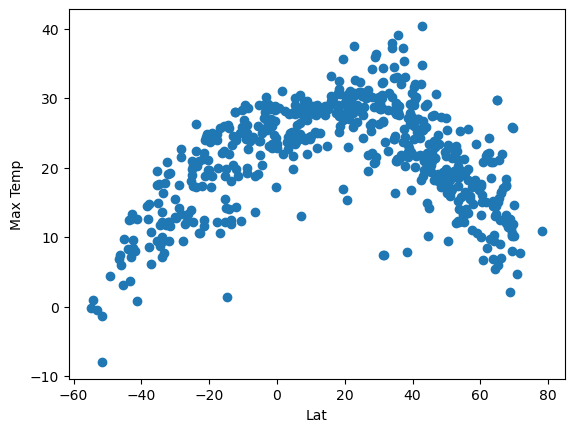

In [35]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df['Lat']
y_value = city_data_df['Max Temp']

plt.scatter(x_value,y_value)
plt.ylabel ('Max Temp')
plt.xlabel ('Lat')

# Incorporate the other graph properties
# 

# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()


#### Latitude Vs. Humidity

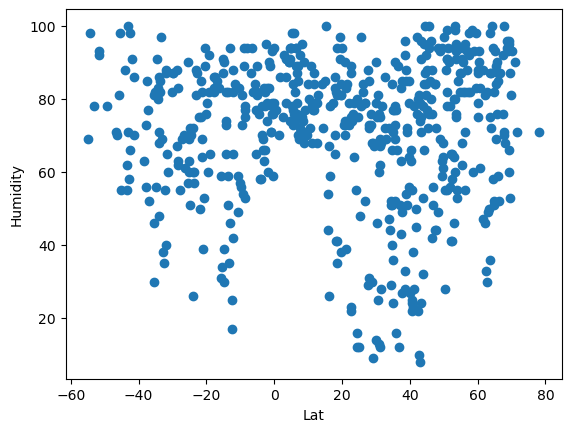

In [36]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df['Lat']
y_value = city_data_df['Humidity']

plt.scatter(x_value,y_value)
plt.ylabel ('Humidity')
plt.xlabel ('Lat')


# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

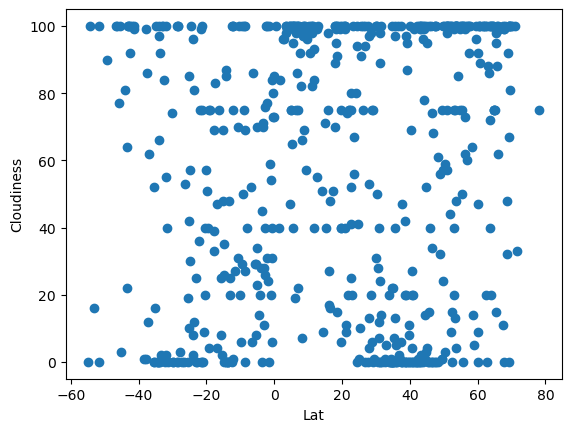

In [37]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df['Lat']
y_value = city_data_df['Cloudiness']

plt.scatter(x_value,y_value)
plt.ylabel ('Cloudiness')
plt.xlabel ('Lat')

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

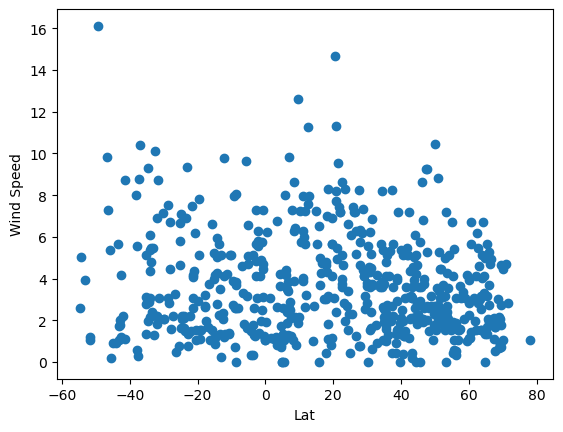

In [38]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df['Lat']
y_value = city_data_df['Wind Speed']

plt.scatter(x_value,y_value)
plt.ylabel ('Wind Speed')
plt.xlabel ('Lat')

# Incorporate the other graph properties
 

# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,13.28,82,75,5.00,RU,1690424017
3,kodiak,57.7900,-152.4072,14.73,82,100,3.09,US,1690424018
4,penzance,50.1186,-5.5371,16.38,97,100,10.45,GB,1690424018
6,cabo san lucas,22.8909,-109.9124,32.56,74,20,4.63,MX,1690423828
7,novouzensk,50.4592,48.1431,23.29,55,59,2.30,RU,1690424018


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,23.99,88,75,9.77,CC,1690424018
2,tutoia,-2.7619,-42.2744,26.39,82,76,5.67,BR,1690424018
5,irati,-25.4672,-50.6511,13.86,90,19,0.76,BR,1690424018
10,puerto natales,-51.7236,-72.4875,-1.38,92,100,1.18,CL,1690424018
12,punta arenas,-53.1500,-70.9167,-0.43,78,16,3.93,CL,1690424019


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3905212038969828


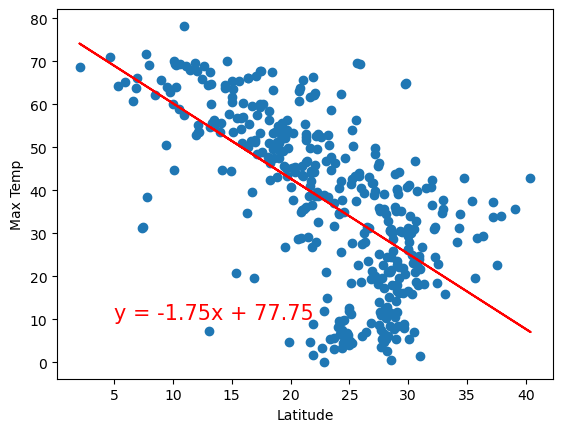

In [42]:
# Linear regression on Northern Hemisphere
x_northern_temperature = northern_hemi_df["Max Temp"]
y_northern_latitude = northern_hemi_df["Lat"]
title = 'Max Temp'
linear_reg_plot(x_northern_temperature, y_northern_latitude, title, (5,10))

The r-value is: 0.651589028687203


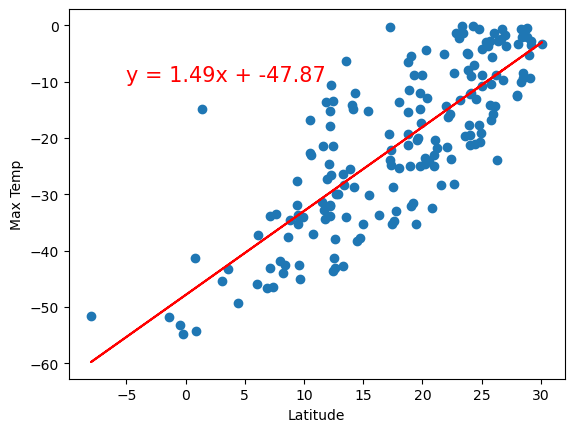

In [43]:
# Linear regression on Southern Hemisphere
x_southern_temperature = southern_hemi_df["Max Temp"]
y_southern_latitude = southern_hemi_df["Lat"]
title = 'Max Temp'
linear_reg_plot(x_southern_temperature, y_southern_latitude, title, (-5,-10))


**Discussion about the linear relationship:** The r value is .73 and .36 and therefore temperature is very strongly coorelated with latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00014128237575517142


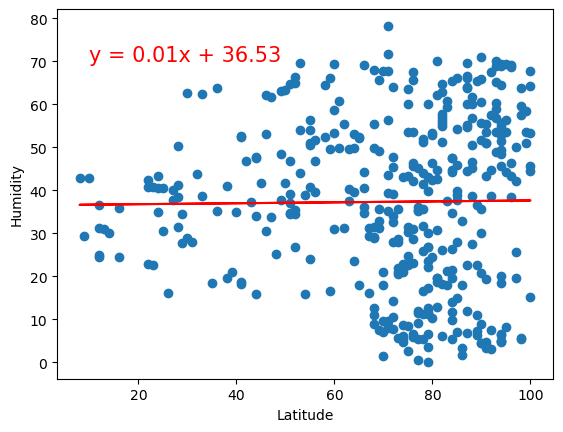

In [44]:
# Northern Hemisphere
x_northern_humidity = northern_hemi_df["Humidity"]
y_northern_latitude = northern_hemi_df["Lat"]
title = 'Humidity'
linear_reg_plot(x_northern_humidity, y_northern_latitude, title, (10,70))

The r-value is: 7.737383929970405e-08


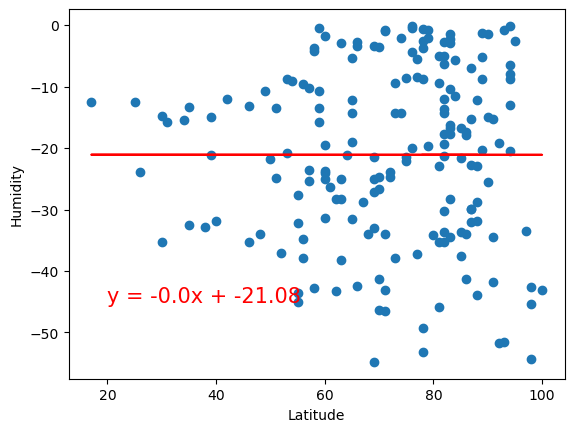

In [45]:
# Southern Hemisphere
x_southern_humidity = southern_hemi_df["Humidity"]
y_southern_latitude = southern_hemi_df["Lat"]
title = 'Humidity'
linear_reg_plot(x_southern_humidity, y_southern_latitude, title, (20,-45))

**Discussion about the linear relationship:** R value is only 0.02 and 0.001 therefore statistically insignificant, humidity likely relies more on proximity to large bodies of water and heat than just latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.001186943165483564


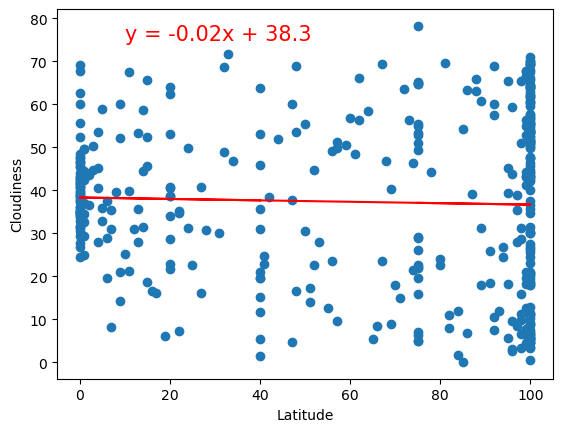

In [46]:
# Northern Hemisphere
x_northern_cloudiness = northern_hemi_df["Cloudiness"]
y_northern_latitude = northern_hemi_df["Lat"]
title = 'Cloudiness'
linear_reg_plot(x_northern_cloudiness, y_northern_latitude, title, (10,75))


The r-value is: 0.01333247275562149


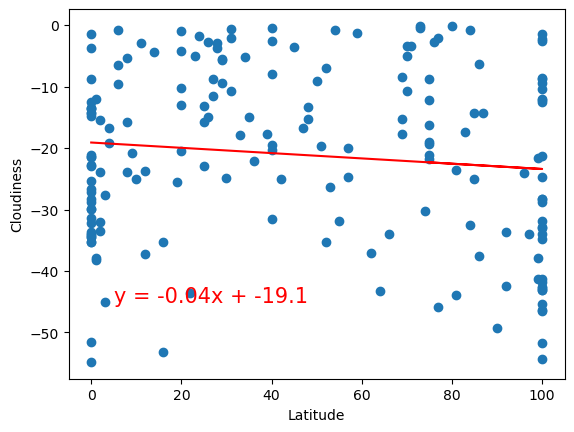

In [47]:
# Southern Hemisphere
x_southern_cloudiness = southern_hemi_df["Cloudiness"]
y_southern_latitude = southern_hemi_df["Lat"]
title = 'Cloudiness'
linear_reg_plot(x_southern_cloudiness, y_southern_latitude, title, (5,-45))

**Discussion about the linear relationship:** R value is under .05 and therefore statistically insignificant, separate factors such as elevation and coastal proximity and large bodies of water may prove more statistically significant than latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.001186943165483564


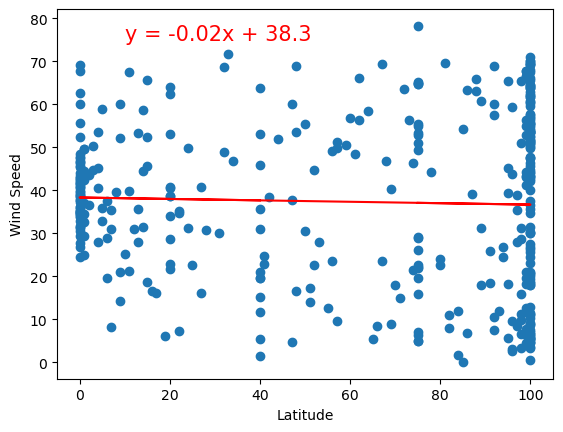

In [48]:
# Northern Hemisphere
x_northern_wind_speed = northern_hemi_df["Wind Speed"]
y_northern_latitude = northern_hemi_df["Lat"]
title = 'Wind Speed'
linear_reg_plot(x_northern_cloudiness, y_northern_latitude, title, (10,75))

The r-value is: 0.007867386175456362


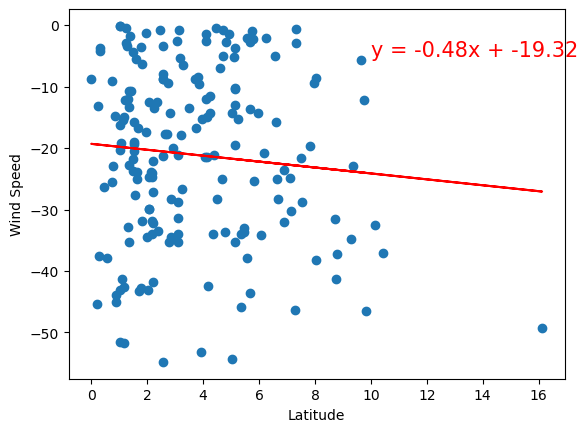

In [49]:
# Southern Hemisphere
x_southern_wind_speed = southern_hemi_df["Wind Speed"]
y_southern_latitude = southern_hemi_df["Lat"]
title = 'Wind Speed'
linear_reg_plot(x_southern_wind_speed, y_southern_latitude, title, (10,-5))

**Discussion about the linear relationship:** r values proved statistically insignificant under .05 for both hemispheres. Latitude is not a strong predicter of wind speed alone. Coasts and places of rapidly changing temperatures may result in higher windspeeds.